In [7]:
import sympy
sympy.init_printing()

u_max,u_star,rho_max,rho_star,A,B =\
sympy.symbols('u_max u_star rho_max rho_star A B')

In [8]:
eq1 = sympy.Eq(0,u_max*rho_max*(1 - A*rho_max-B*rho_max**2))
eq2 = sympy.Eq(0,u_max*(1-2*A*rho_star-3*B*rho_star**2))
eq3 = sympy.Eq(u_star,u_max*(1-A*rho_star-B*rho_star**2))

In [9]:
eq1

In [10]:
eq2

In [11]:
eq3

In [12]:
eq2-eq3

In [13]:
eq4 = sympy.Eq(eq2.lhs - 3*eq3.lhs, eq2.rhs - 3*eq3.rhs)
eq4

In [14]:
eq4.simplify()

In [15]:
eq4

In [16]:
eq4.expand()

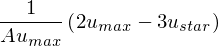

In [19]:
rho_sol = sympy.solve(eq4,rho_star)[0]
rho_sol

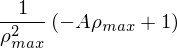

In [20]:
B_sol = sympy.solve(eq1,B)[0]
B_sol

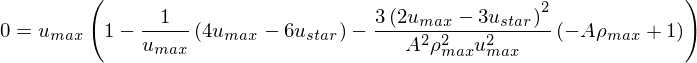

In [21]:
quadA = eq2.subs([(rho_star, rho_sol), (B,B_sol)])
quadA

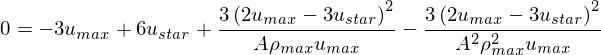

In [22]:
quadA.simplify()

In [23]:
A_sol = sympy.solve(quadA,A)

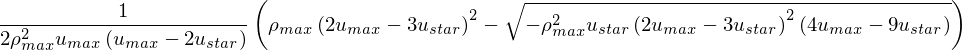

In [24]:
A_sol[0]

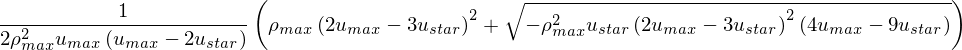

In [25]:
A_sol[1]

In [26]:
aval = A_sol[0].evalf(subs={u_star:0.7,u_max:1.0,rho_max:10.0})
aval

In [27]:
A_sol[1].evalf(subs={u_star:0.7,u_max:1.0,rho_max:10.0})

In [28]:
bval = B_sol.evalf(subs={rho_max:10.0,A:aval})
bval

In [29]:
sympy.init_printing(use_latex=False)

In [34]:
type (rho_max), type(u_max)

(sympy.core.symbol.Symbol, sympy.core.symbol.Symbol)

In [35]:
rho_max = 10.
u_max = 1.

In [36]:
def computeF(u_max,rho,aval,bval):
    return u_max*rho*(1-aval*rho-bval*rho**2)

In [38]:
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family']='serif'
rcParams['font.size']=16

In [40]:
def rho_green_light(nx,rho_light):
    rho_initial=numpy.arange(nx)*2./nx*rho_light
    rho_initial[(nx-1)/2:]=0
    return rho_initial

In [41]:
nx = 81
nt = 30
dx = 4.0/(nx-1)
x = numpy.linspace(0,4,nx)
rho_light = 5.5

In [42]:
rho_initial = rho_green_light(nx,rho_light)

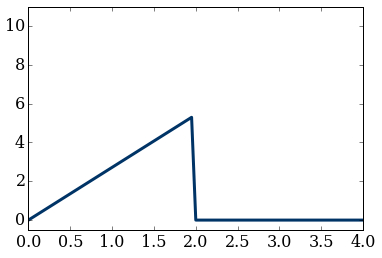

In [43]:
pyplot.plot(x,rho_initial,color='#003366', ls ='-', lw=3)
pyplot.ylim(-0.5,11.);

In [48]:
def ftbs(rho,nt,dt,dx,rho_max,u_max):
    rho_n = numpy.zeros((nt,len(rho)))
    rho_n[0,:]=rho.copy()
    
    for t in range(1,nt):
        F = computeF(u_max,rho,aval,bval)
        rho_n[t,1:] = rho[1:] - dt/dx*(F[1:]-F[:-1])
        rho_n[t,0]=rho[0]
        rho_n[t,-1]=rho[-1]
        rho = rho_n[t].copy()
    return rho_n

In [51]:
sigma=1.
dt = sigma*dx/u_max
rho_n = ftbs(rho_initial,nt,dt,dx,rho_max,u_max)

In [52]:
from matplotlib import animation
from JSAnimation.IPython_display import display_animation


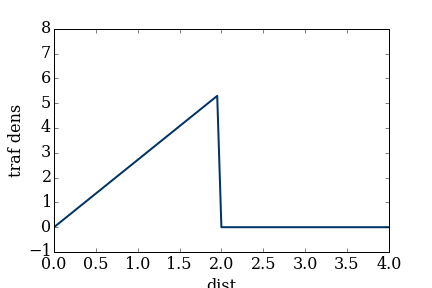
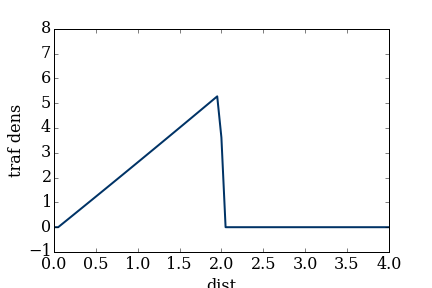
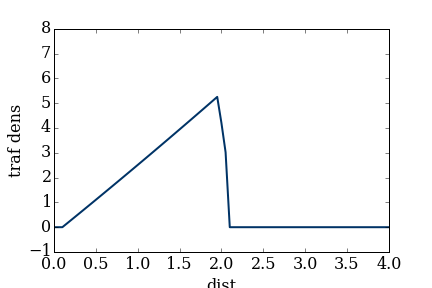
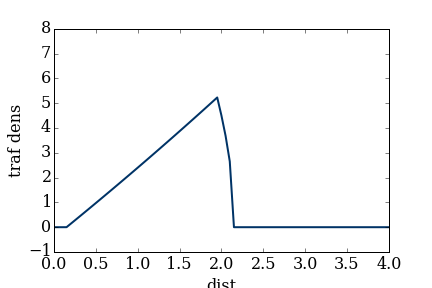
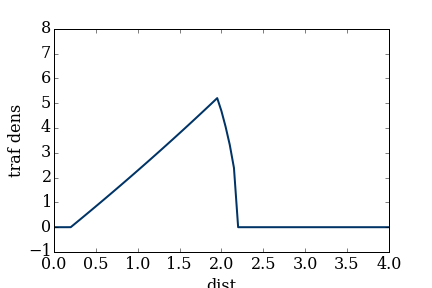
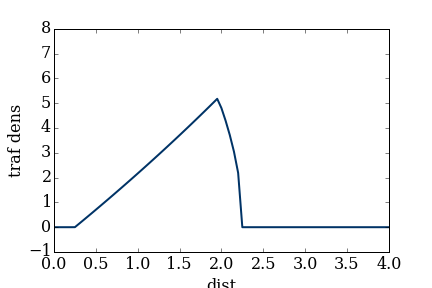
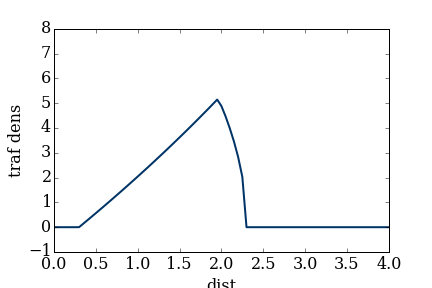
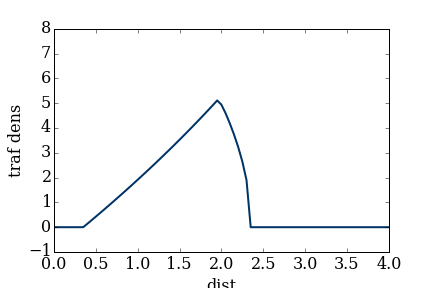
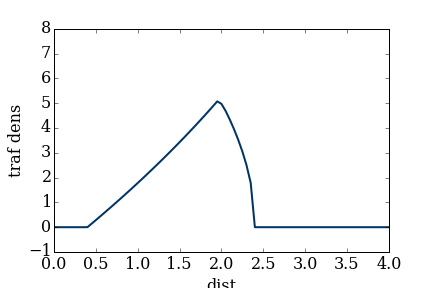
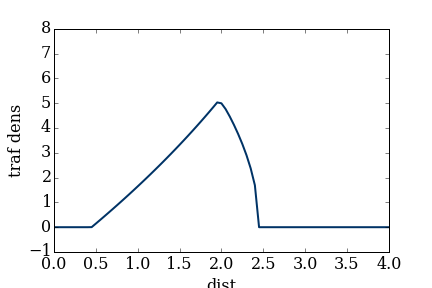
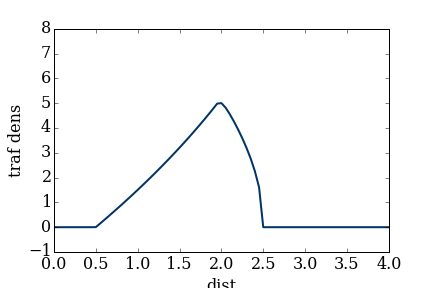
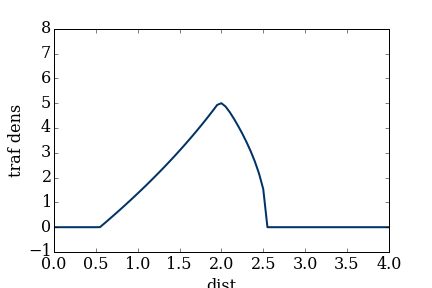
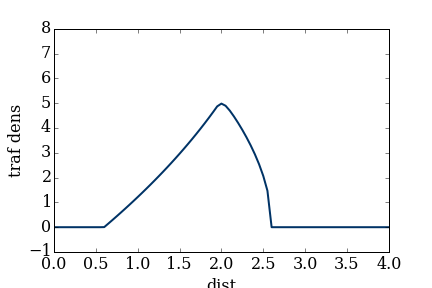
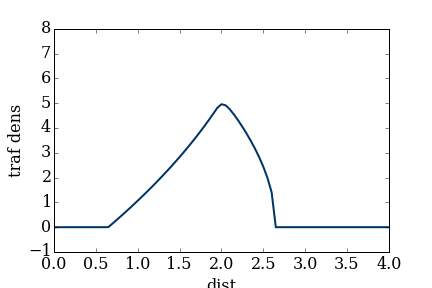
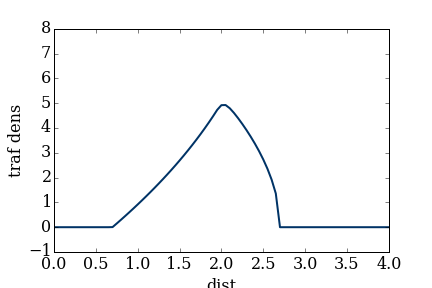
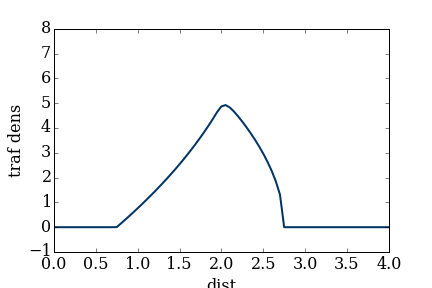
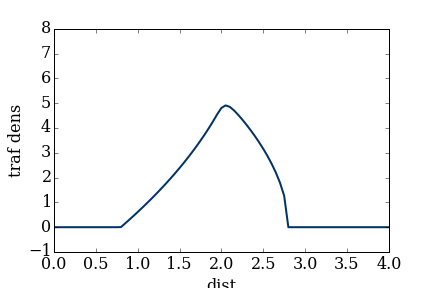
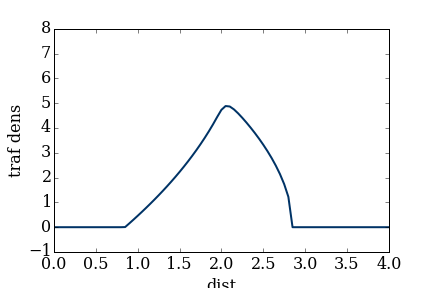
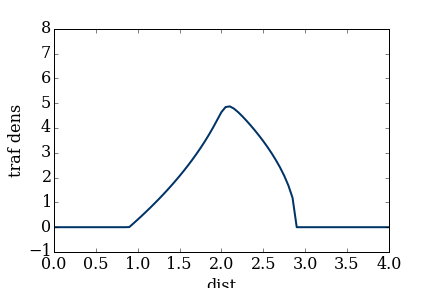
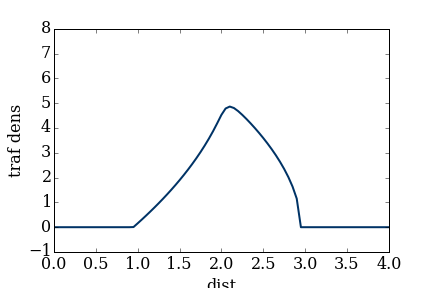
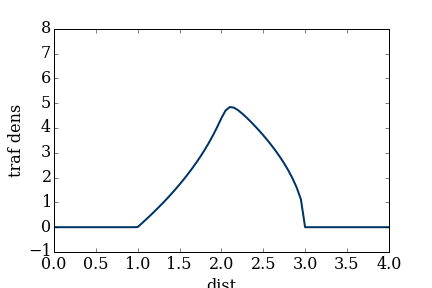
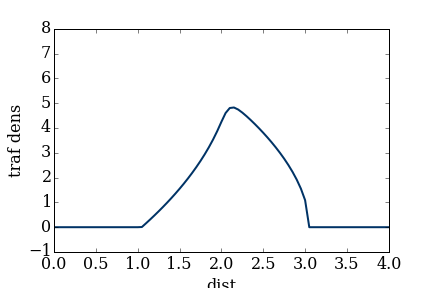
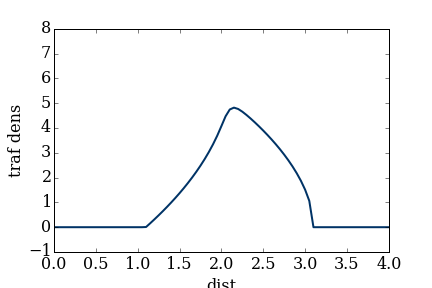
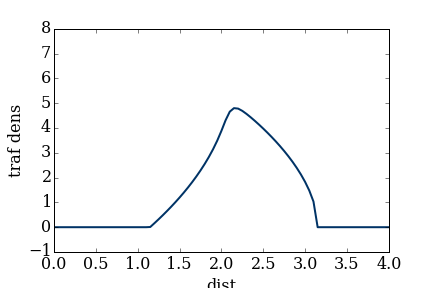
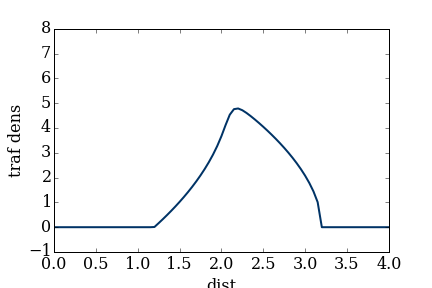
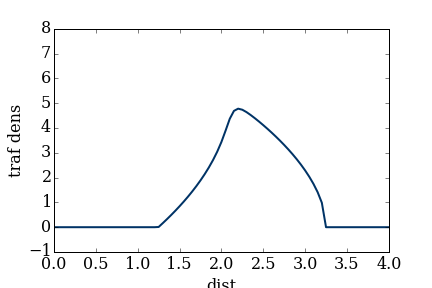
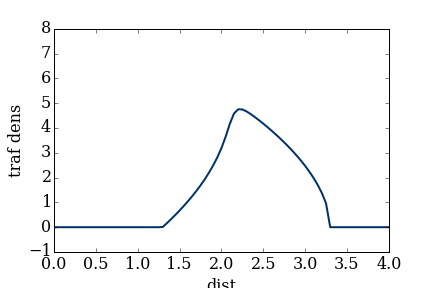
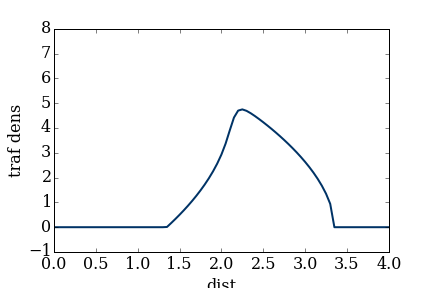
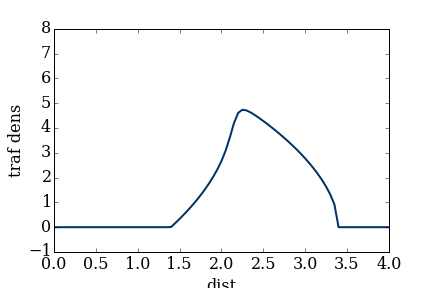
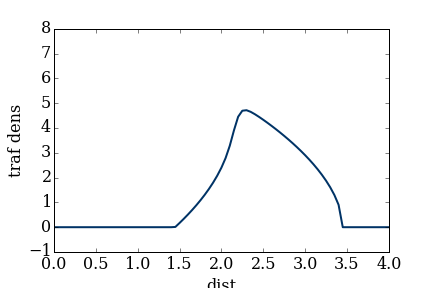

In [54]:
fig = pyplot.figure();
ax = pyplot.axes(xlim=(0,4),ylim=(-1,8),xlabel=('dist'),ylabel=('traf dens'));
line,=ax.plot([],[],color='#003366',lw=2);

def animate(data):
    x = numpy.linspace(0,4,nx)
    y = data
    line.set_data(x,y)
    return line,

anim = animation.FuncAnimation(fig,animate,frames=rho_n,interval=50)
display_animation(anim,default_mode='once')